In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('/users/jeranknorr/documents/course_project_group_6019/analysis') 
import Project_Functions as pf
import scripts as sc
df = pf.load_and_process()


### Research Question #1 ###
---
## Which Team Has the Best Offence? ##
To Answer this question we used the data from the top player from each offensive position (Quaterback,Wide Reciever, Tight End and Half Back) we excluded that data from full backs as not every NFL carries one on thier roster as well as Half Backs tend to recieve more touches on running plays. offenseive line was also excluded as in fantasy football they do not track the stats for these players. Futhermore, Quaterbacks were given double the weight compared to other positions as the Quaterback is involved in pretty much every play. 

In [46]:

 #Max value for Each quater back

dfQB = sc.QuarterBack_Score(df)

In [47]:
 #Max value for Each Tight end
    
dfTE = pf.TightEnd_Score(df)


In [48]:
 #Max value for Each Wide Reciever
    
dfWR = pf.WideReceiver_Score(df)



In [49]:
 #Max value for Each Full Back

dfFB = pf.FullBack_Score(df)


In [50]:
 #Max value for Each Half Back

dfHB = pf.HalfBack_Score(df)


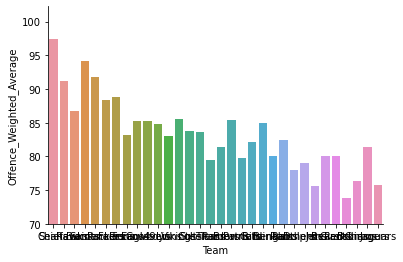

In [51]:
dfOffence_Weighted_Average= pd.merge(dfQB,dfWR).merge(dfTE).merge(dfHB)
dfOffence_Weighted_Average['Offence_Weighted_Average']=(dfOffence_Weighted_Average['Top Quaterback']*.4)+(dfOffence_Weighted_Average['Top Wide Receiver']*.2)+(dfOffence_Weighted_Average['Top Tight End']*.2)+(dfOffence_Weighted_Average['Top Half Back']*.2)
dfOffence_Weighted_Average.sort_values('Offence_Weighted_Average', ascending=False)
dfOffence_Weighted_Average.filter(['Team', 'Offence_Weighted_Average']).reset_index(drop=True)
sns.barplot(data=dfOffence_Weighted_Average, x='Team', y='Offence_Weighted_Average')
plt.ylim(ymin=70)
sns.despine()

## Reasearch #1 Conclusion ##
---
Analysis proved that the chiefs has the best offence in the league and the jaguars have the worst

### Reasearch Question #2 ###
## Which Team Has the Best Defense? ##
---
To answer this question we used the top player at each defensive position (middle linebacker, right outside linebacker, left outside linebacker, free safety, strong safety, corner back, defensive tackle, left defensive end and right defensive end). Each position was given and equal weighted except for corner back which recived double as this position has a larger effect on the teams overall defense since they run with the wide recievers

In [52]:
#Max value for Each Corner Back
    
dfCB = sc.CornerBack_Score(df)


In [53]:
#Max value for Each Right Outside Line Backer

dfROLB = sc.RightOutsideLinebacker_Score(df)


In [54]:
 #Max value for Each Left Outside Line Backer
    
dfLOLB = sc.LeftOutsideLinebacker_Score(df)


In [55]:
#Max value for Each Middle Line Backer
    
dfMLB = sc.MiddleLinebacker_Score(df)


In [56]:
#Max value for Each Free Safty
    
dfFS = sc.FreeSafety_Score(df)


In [57]:
#Max value for Each Strong Saftey
    
dfSS = sc.StrongSafety_Score(df)


In [58]:
#Max value for Each Defensive Tackle
    
dfDT = sc.DefensiveTackle_Score(df)


In [59]:
#Max value for Each Defensive Left end

dfLE = sc.LeftEnd_Score(df)


In [60]:
#Max value for Each Defensive right end
    
dfRE = sc.RightEnd_Score(df)


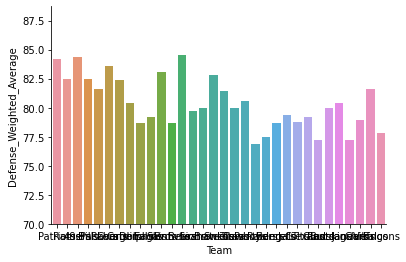

In [61]:
dfDefense_Weighted_Average = pd.merge(dfCB,dfROLB).merge(dfLOLB).merge(dfSS).merge(dfFS).merge(dfMLB).merge(dfDT).merge(dfLE).merge(dfRE)
dfDefense_Weighted_Average['Defense_Weighted_Average']=(dfDefense_Weighted_Average['Top Corner Back']*.2)+(dfDefense_Weighted_Average['Top Right Outside Linebacker']*.1)+(dfDefense_Weighted_Average['Top Left Outside Linebacker']*.1)+(dfDefense_Weighted_Average['Top Middle Linebacker']*.1)+(dfDefense_Weighted_Average['Top Free Safety']*.1)+(dfDefense_Weighted_Average['Top Strong Saftey']*.1)+(dfDefense_Weighted_Average['Top Defensive Tackle']*.1)+(dfDefense_Weighted_Average['Top Defensive Left End']*.1)+(dfDefense_Weighted_Average['Top Defensive Right End']*.1)
dfDefense_Weighted_Average.filter(['Team', 'Defense_Weighted_Average']).sort_values('Defense_Weighted_Average', ascending=False).reset_index(drop=True)
sns.barplot(data=dfDefense_Weighted_Average, x='Team', y='Defense_Weighted_Average')
plt.ylim(ymin=70)
sns.despine()

## Reaseach Question #2 Conclusion ##
---
analysis proved the Bears have the best overal defense and the Panthers have the worst

### Reaserch Question #3 ###
## Which Team has the best Kicker/Punter? ##
---
To answer this question we used the best kicker and punter from each team and assigned the kicker a relively larger weighted average compared to the punter as the kicker is more valueable to a teams success

In [62]:
 #Max value for Each Kicker
    
dfK = sc.Kicker_Score(df)


In [63]:
 #Max value for Each Punter
    
dfP = sc.Punter_Score(df)

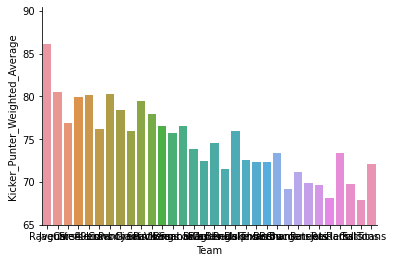

In [64]:
dfKicker_Punter_Weighted_Average = pd.merge(dfK,dfP)
dfKicker_Punter_Weighted_Average['Kicker_Punter_Weighted_Average']=(dfKicker_Punter_Weighted_Average['Top Punter']*.3)+(dfKicker_Punter_Weighted_Average['Top Kicker']*.7)
dfKicker_Punter_Weighted_Average.filter(['Team', 'Kicker_Punter_Weighted_Average']).sort_values('Kicker_Punter_Weighted_Average', ascending=False).reset_index(drop=True)
sns.barplot(data=dfKicker_Punter_Weighted_Average, x='Team', y='Kicker_Punter_Weighted_Average')
plt.ylim(ymin=65)
sns.despine()

## Research Question 3 Conclusion ##
---
Analysis proved the Ravens have the best duo while the Falcons have the worst

### Reaserch Question #4 ###
## Which Team is the Best Overall? ##
---
To answer this question we used the weighted averages we created for Offence, Defense and Kicker/Punter. We gave Offence and Defense the Majoity of the weight and Kicker/Punter only 10% of the total weight as Offence and Defense is more valueable to win games

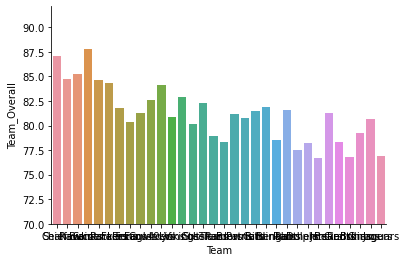

In [65]:
dfTeam_Overall = pd.merge(dfOffence_Weighted_Average,dfDefense_Weighted_Average).merge(dfKicker_Punter_Weighted_Average)
dfTeam_Overall['Team_Overall']= (dfTeam_Overall['Offence_Weighted_Average']*.45)+(dfTeam_Overall['Defense_Weighted_Average']*.45)+(dfTeam_Overall['Kicker_Punter_Weighted_Average']*.1)
dfTeam_Overall.filter(['Team','Team_Overall']).sort_values('Team_Overall', ascending=False).reset_index(drop=True)
sns.barplot(data=dfTeam_Overall, x='Team', y='Team_Overall')
plt.ylim(ymin=70)
sns.despine()

## Reasearch Question #4 Conculsion ##
---
Analysis proved that the Saints are statistically the best team in the game while the Jets are the Worst